In [66]:
!pip install Vnstock --quiet

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vnstock import Vnstock
from sklearn.linear_model import LinearRegression

stock = Vnstock().stock()

2025-04-11 03:23:06 - vnstock.common.vnstock - INFO - Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
INFO:vnstock.common.vnstock:Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
2025-04-11 03:23:06 - vnstock.common.data.data_explorer - INFO - Không phải là mã chứng khoán, thông tin công ty và tài chính không khả dụng.
INFO:vnstock.common.data.data_explorer:Không phải là mã chứng khoán, thông tin công ty và tài chính không khả dụng.


In [68]:
start = '2008-01-01'
end = '2025-04-08'
VNINDEX = Vnstock().stock(symbol='VNINDEX')
VN30 = Vnstock().stock(symbol='VN30')
FPT = Vnstock().stock(symbol='FPT')
CMC = Vnstock().stock(symbol ='CMG')

VNINDEX_stock = VNINDEX.quote.history(start=start, end=end, interval='1D')
VN30_stock = VN30.quote.history(start=start, end=end, interval='1D')
FPT_stock = FPT.quote.history(start=start, end=end, interval='1D')
CMC_stock = CMC.quote.history(start=start, end=end, interval='1D')

2025-04-11 03:23:07 - vnstock.common.data.data_explorer - INFO - Không phải là mã chứng khoán, thông tin công ty và tài chính không khả dụng.
INFO:vnstock.common.data.data_explorer:Không phải là mã chứng khoán, thông tin công ty và tài chính không khả dụng.
2025-04-11 03:23:07 - vnstock.common.data.data_explorer - INFO - Không phải là mã chứng khoán, thông tin công ty và tài chính không khả dụng.
INFO:vnstock.common.data.data_explorer:Không phải là mã chứng khoán, thông tin công ty và tài chính không khả dụng.


In [69]:
#Biến động giá cổ phiếu tương quan dương với khối lượng giao dịch hàng ngày. (kiểm định bằng pearson)
from scipy.stats import pearsonr

# Calculate daily price changes
VNINDEX_stock['Price_Change'] = VNINDEX_stock['close'].diff()
VN30_stock['Price_Change'] = VN30_stock['close'].diff()
FPT_stock['Price_Change'] = FPT_stock['close'].diff()
CMC_stock['Price_Change'] = CMC_stock['close'].diff()


# Calculate Pearson correlation between price change and volume
VNINDEX_corr, VNINDEX_p_value = pearsonr(VNINDEX_stock['Price_Change'][1:], VNINDEX_stock['volume'][1:])
VN30_corr, VN30_p_value = pearsonr(VN30_stock['Price_Change'][1:], VN30_stock['volume'][1:])
FPT_corr, FPT_p_value = pearsonr(FPT_stock['Price_Change'][1:], FPT_stock['volume'][1:])
CMC_corr, CMC_p_value = pearsonr(CMC_stock['Price_Change'][1:], CMC_stock['volume'][1:])


print(f"VNINDEX Correlation: {VNINDEX_corr:.4f}, p-value: {VNINDEX_p_value:.4f}")
print(f"VN30 Correlation: {VN30_corr:.4f}, p-value: {VN30_p_value:.4f}")
print(f"FPT Correlation: {FPT_corr:.4f}, p-value: {FPT_p_value:.4f}")
print(f"CMC Correlation: {CMC_corr:.4f}, p-value: {CMC_p_value:.4f}")


VNINDEX Correlation: -0.0726, p-value: 0.0001
VN30 Correlation: -0.0778, p-value: 0.0007
FPT Correlation: -0.0260, p-value: 0.0881
CMC Correlation: 0.0350, p-value: 0.0309


In [70]:

import statsmodels.formula.api as sm
# Import the stats module directly
from statsmodels.stats import anova

# Assuming 'volume' is the trading volume and 'Price_Change' is the daily price change.
# We'll create a categorical variable 'High_Volume' based on a threshold.
# You'll need to determine an appropriate threshold for 'high volume'.  This is crucial for the analysis.

# Example using a simple threshold, you should adjust this based on your data.
threshold = VNINDEX_stock['volume'].quantile(0.75)  # Using the 75th percentile as an example
VNINDEX_stock['High_Volume'] = (VNINDEX_stock['volume'] > threshold).astype(int)


# Perform ANOVA
model = sm.ols('Price_Change ~ C(High_Volume)', data=VNINDEX_stock[1:]).fit()
# Use the imported anova function directly
anova_table = anova.anova_lm(model, typ=2)

print(anova_table)


# Repeat the process for other stocks (VN30, FPT, CMC)

threshold_vn30 = VN30_stock['volume'].quantile(0.75)
VN30_stock['High_Volume'] = (VN30_stock['volume'] > threshold_vn30).astype(int)
model_vn30 = sm.ols('Price_Change ~ C(High_Volume)', data=VN30_stock[1:]).fit()
# Use the imported anova function directly
anova_table_vn30 = anova.anova_lm(model_vn30, typ=2)
print(anova_table_vn30)

threshold_fpt = FPT_stock['volume'].quantile(0.75)
FPT_stock['High_Volume'] = (FPT_stock['volume'] > threshold_fpt).astype(int)
model_fpt = sm.ols('Price_Change ~ C(High_Volume)', data=FPT_stock[1:]).fit()
# Use the imported anova function directly
anova_table_fpt = anova.anova_lm(model_fpt, typ=2)
print(anova_table_fpt)

threshold_cmc = CMC_stock['volume'].quantile(0.75)
CMC_stock['High_Volume'] = (CMC_stock['volume'] > threshold_cmc).astype(int)
model_cmc = sm.ols('Price_Change ~ C(High_Volume)', data=CMC_stock[1:]).fit()
# Use the imported anova function directly
anova_table_cmc = anova.anova_lm(model_cmc, typ=2)
anova_table_cmc

                       sum_sq      df         F    PR(>F)
C(High_Volume)     751.910210     1.0  6.106119  0.013526
Residual        376070.920178  3054.0       NaN       NaN
                       sum_sq      df         F    PR(>F)
C(High_Volume)    1319.929812     1.0  6.447871  0.011188
Residual        388944.896449  1900.0       NaN       NaN
                     sum_sq      df        F   PR(>F)
C(High_Volume)     3.615260     1.0  7.22438  0.00722
Residual        2152.327748  4301.0      NaN      NaN


,sum_sq,df,F,PR(>F)
C(High_Volume),2.633847,1.0,11.2735,0.000794
Residual,885.697861,3791.0,NaN,NaN


In [71]:

def interpret_anova(anova_table, stock_name):
    print(f"ANOVA Results for {stock_name}:")
    print(anova_table)
    alpha = 0.05  # Significance level
    p_value = anova_table['PR(>F)'][0]
    if p_value < alpha:
        print(f"There is a statistically significant difference in price changes between high and low volume days for {stock_name}.")
    else:
        print(f"There is no statistically significant difference in price changes between high and low volume days for {stock_name}.")
    print("-" * 30)

# Interpret results for each stock
interpret_anova(anova_table, "VNINDEX")
interpret_anova(anova_table_vn30, "VN30")
interpret_anova(anova_table_fpt, "FPT")
interpret_anova(anova_table_cmc, "CMC")


ANOVA Results for VNINDEX:
                       sum_sq      df         F    PR(>F)
C(High_Volume)     751.910210     1.0  6.106119  0.013526
Residual        376070.920178  3054.0       NaN       NaN
There is a statistically significant difference in price changes between high and low volume days for VNINDEX.
------------------------------
ANOVA Results for VN30:
                       sum_sq      df         F    PR(>F)
C(High_Volume)    1319.929812     1.0  6.447871  0.011188
Residual        388944.896449  1900.0       NaN       NaN
There is a statistically significant difference in price changes between high and low volume days for VN30.
------------------------------
ANOVA Results for FPT:
                     sum_sq      df        F   PR(>F)
C(High_Volume)     3.615260     1.0  7.22438  0.00722
Residual        2152.327748  4301.0      NaN      NaN
There is a statistically significant difference in price changes between high and low volume days for FPT.
----------------------------

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [72]:

import pandas as pd
from scipy import stats

# Assuming VNINDEX_stock, VN30_stock, FPT_stock, and CMC_stock are already defined and contain 'volume' and 'Price_Change' columns

def t_test_price_volume(stock_data, stock_name):

    # Split data into high and low volume groups
    high_volume_prices = stock_data[stock_data['High_Volume'] == 1]['Price_Change']
    low_volume_prices = stock_data[stock_data['High_Volume'] == 0]['Price_Change']

    # Perform the t-test
    t_statistic, p_value = stats.ttest_ind(high_volume_prices, low_volume_prices)

    print(f"T-test results for {stock_name}:")
    print(f"  T-statistic: {t_statistic:.4f}")
    print(f"  P-value: {p_value:.4f}")

    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference in price change between high and low volume days.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in price change between high and low volume days.")


# Example usage:
t_test_price_volume(VNINDEX_stock[1:], "VNINDEX")
t_test_price_volume(VN30_stock[1:], "VN30")
t_test_price_volume(FPT_stock[1:], "FPT")
t_test_price_volume(CMC_stock[1:], "CMC")


T-test results for VNINDEX:
  T-statistic: -2.4711
  P-value: 0.0135
Reject the null hypothesis: There is a significant difference in price change between high and low volume days.
T-test results for VN30:
  T-statistic: -2.5393
  P-value: 0.0112
Reject the null hypothesis: There is a significant difference in price change between high and low volume days.
T-test results for FPT:
  T-statistic: 2.6878
  P-value: 0.0072
Reject the null hypothesis: There is a significant difference in price change between high and low volume days.
T-test results for CMC:
  T-statistic: 3.3576
  P-value: 0.0008
Reject the null hypothesis: There is a significant difference in price change between high and low volume days.


In [73]:

window_size = 20  # Example window size, adjust as needed
VNINDEX_stock['Volatility'] = VNINDEX_stock['Price_Change'].rolling(window=window_size).std()
VN30_stock['Volatility'] = VN30_stock['Price_Change'].rolling(window=window_size).std()
FPT_stock['Volatility'] = FPT_stock['Price_Change'].rolling(window=window_size).std()
CMC_stock['Volatility'] = CMC_stock['Price_Change'].rolling(window=window_size).std()


# Liquidity = Volatility * Volume (you might need to normalize or scale these)
VNINDEX_stock['Liquidity'] = VNINDEX_stock['Volatility'] * VNINDEX_stock['volume']
VN30_stock['Liquidity'] = VN30_stock['Volatility'] * VN30_stock['volume']
FPT_stock['Liquidity'] = FPT_stock['Volatility'] * FPT_stock['volume']
CMC_stock['Liquidity'] = CMC_stock['Volatility'] * CMC_stock['volume']


def analyze_liquidity_impact(stock_data, stock_name):
    # Remove rows with NaN values (introduced by rolling calculations)
    stock_data = stock_data.dropna()

    # Linear Regression
    model = sm.ols('close ~ Liquidity', data=stock_data).fit()
    print(f"\nRegression results for {stock_name}:")
    print(model.summary())

    #Correlation
    correlation, p_value = pearsonr(stock_data['Liquidity'], stock_data['close'])
    print(f"\nCorrelation between Liquidity and Price for {stock_name}:")
    print(f"Correlation: {correlation:.4f}, p-value: {p_value:.4f}")


    alpha = 0.05
    if p_value < alpha:
        print(f"There is a statistically significant correlation between liquidity and price for {stock_name}")
    else:
        print(f"There is no statistically significant correlation between liquidity and price for {stock_name}")

# Analyze the impact of liquidity on price for each stock
analyze_liquidity_impact(VNINDEX_stock, "VNINDEX")
analyze_liquidity_impact(VN30_stock, "VN30")
analyze_liquidity_impact(FPT_stock, "FPT")
analyze_liquidity_impact(CMC_stock, "CMC")



Regression results for VNINDEX:
                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     2864.
Date:                Fri, 11 Apr 2025   Prob (F-statistic):               0.00
Time:                        03:23:26   Log-Likelihood:                -20531.
No. Observations:                3037   AIC:                         4.107e+04
Df Residuals:                    3035   BIC:                         4.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    748.12

In [74]:

def analyze_high_liquidity_impact(stock_data, stock_name):
    # Remove rows with NaN values (introduced by rolling calculations)
    stock_data = stock_data.dropna()

    # Define high liquidity based on a threshold (e.g., 75th percentile)
    liquidity_threshold = stock_data['Liquidity'].quantile(0.75)
    stock_data['High_Liquidity'] = (stock_data['Liquidity'] > liquidity_threshold).astype(int)

    # Perform ANOVA to compare price changes between high and low liquidity days
    model = sm.ols('Price_Change ~ C(High_Liquidity)', data=stock_data).fit()
    anova_table = anova.anova_lm(model, typ=2)
    print(f"\nANOVA Results for {stock_name} (High Liquidity Impact):")
    print(anova_table)

    alpha = 0.05
    p_value = anova_table['PR(>F)'][0]
    if p_value < alpha:
      print(f"There is a statistically significant difference in price changes between high and low liquidity days for {stock_name}.")
    else:
      print(f"There is no statistically significant difference in price changes between high and low liquidity days for {stock_name}.")

# Analyze the impact of high liquidity on price changes for each stock
analyze_high_liquidity_impact(VNINDEX_stock, "VNINDEX")
analyze_high_liquidity_impact(VN30_stock, "VN30")
analyze_high_liquidity_impact(FPT_stock, "FPT")
analyze_high_liquidity_impact(CMC_stock, "CMC")



ANOVA Results for VNINDEX (High Liquidity Impact):
                         sum_sq      df         F    PR(>F)
C(High_Liquidity)     541.30524     1.0  4.378268  0.036483
Residual           375230.86451  3035.0       NaN       NaN
There is a statistically significant difference in price changes between high and low liquidity days for VNINDEX.

ANOVA Results for VN30 (High Liquidity Impact):
                          sum_sq      df         F    PR(>F)
C(High_Liquidity)     453.194474     1.0  2.188785  0.139186
Residual           389466.594952  1881.0       NaN       NaN
There is no statistically significant difference in price changes between high and low liquidity days for VN30.



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



ANOVA Results for FPT (High Liquidity Impact):
                        sum_sq      df         F    PR(>F)
C(High_Liquidity)     3.560007     1.0  7.087413  0.007792
Residual           2150.848375  4282.0       NaN       NaN
There is a statistically significant difference in price changes between high and low liquidity days for FPT.

ANOVA Results for CMC (High Liquidity Impact):
                       sum_sq      df         F    PR(>F)
C(High_Liquidity)    1.825977     1.0  7.786174  0.005291
Residual           884.591724  3772.0       NaN       NaN
There is a statistically significant difference in price changes between high and low liquidity days for CMC.



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [75]:

def t_test_price_volume(stock_data, stock_name):

    # Split data into high and low volume groups
    high_volume_prices = stock_data[stock_data['High_Volume'] == 1]['Price_Change']
    low_volume_prices = stock_data[stock_data['High_Volume'] == 0]['Price_Change']

    # Perform the t-test
    t_statistic, p_value = stats.ttest_ind(high_volume_prices, low_volume_prices)

    print(f"T-test results for {stock_name}:")
    print(f"  T-statistic: {t_statistic:.4f}")
    print(f"  P-value: {p_value:.4f}")

    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference in price change between high and low volume days.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in price change between high and low volume days.")


# Example usage:
t_test_price_volume(VNINDEX_stock[1:], "VNINDEX")
t_test_price_volume(VN30_stock[1:], "VN30")
t_test_price_volume(FPT_stock[1:], "FPT")
t_test_price_volume(CMC_stock[1:], "CMC")


T-test results for VNINDEX:
  T-statistic: -2.4711
  P-value: 0.0135
Reject the null hypothesis: There is a significant difference in price change between high and low volume days.
T-test results for VN30:
  T-statistic: -2.5393
  P-value: 0.0112
Reject the null hypothesis: There is a significant difference in price change between high and low volume days.
T-test results for FPT:
  T-statistic: 2.6878
  P-value: 0.0072
Reject the null hypothesis: There is a significant difference in price change between high and low volume days.
T-test results for CMC:
  T-statistic: 3.3576
  P-value: 0.0008
Reject the null hypothesis: There is a significant difference in price change between high and low volume days.


In [76]:

def analyze_price_volume_relationship(stock_data, stock_name):
    # Calculate daily price changes
    stock_data['Price_Change'] = stock_data['close'].diff()

    # Calculate Pearson correlation between price change and volume
    correlation, p_value = pearsonr(stock_data['Price_Change'][1:], stock_data['volume'][1:])
    print(f"\nCorrelation analysis for {stock_name}:")
    print(f"  Correlation between price change and volume: {correlation:.4f}")
    print(f"  p-value: {p_value:.4f}")

    # Determine the threshold for high volume (e.g., 75th percentile)
    threshold = stock_data['volume'].quantile(0.75)
    stock_data['High_Volume'] = (stock_data['volume'] > threshold).astype(int)

    # Analyze price changes on high vs. low volume days
    high_volume_price_changes = stock_data[stock_data["High_Volume"] == 1]['Price_Change'].dropna()
    low_volume_price_changes = stock_data[stock_data["High_Volume"] == 0]['Price_Change'].dropna()

    avg_price_change_high = high_volume_price_changes.mean()
    avg_price_change_low = low_volume_price_changes.mean()

    print(f"Average price change on high volume days: {avg_price_change_high:.4f}")
    print(f"Average price change on low volume days: {avg_price_change_low:.4f}")

    if avg_price_change_high < avg_price_change_low:
        print(f"Stock {stock_name} experienced a larger average price decrease on high-volume days.")
    else:
      print(f"No significant trend was observed for stock {stock_name}")

# Apply the analysis to each stock
analyze_price_volume_relationship(VNINDEX_stock, "VNINDEX")
analyze_price_volume_relationship(VN30_stock, "VN30")
analyze_price_volume_relationship(FPT_stock, "FPT")
analyze_price_volume_relationship(CMC_stock, "CMC")



Correlation analysis for VNINDEX:
  Correlation between price change and volume: -0.0726
  p-value: 0.0001
Average price change on high volume days: -0.6380
Average price change on low volume days: 0.5076
Stock VNINDEX experienced a larger average price decrease on high-volume days.

Correlation analysis for VN30:
  Correlation between price change and volume: -0.0778
  p-value: 0.0007
Average price change on high volume days: -1.2205
Average price change on low volume days: 0.7026
Stock VN30 experienced a larger average price decrease on high-volume days.

Correlation analysis for FPT:
  Correlation between price change and volume: -0.0260
  p-value: 0.0881
Average price change on high volume days: 0.0725
Average price change on low volume days: 0.0055
No significant trend was observed for stock FPT

Correlation analysis for CMC:
  Correlation between price change and volume: 0.0350
  p-value: 0.0309
Average price change on high volume days: 0.0505
Average price change on low volume 

In [77]:

def analyze_volatility_close_relationship(stock_data, stock_name):
    # Remove rows with NaN values (introduced by rolling calculations)
    stock_data = stock_data.dropna()

    # Calculate the correlation between volatility and closing price
    correlation, p_value = pearsonr(stock_data['Volatility'], stock_data['close'])

    print(f"\nCorrelation analysis for {stock_name}:")
    print(f"  Correlation between Volatility and Closing Price: {correlation:.4f}")
    print(f"  p-value: {p_value:.4f}")

    # Perform t-test
    t_statistic, p_value_ttest = stats.ttest_ind(stock_data['Volatility'], stock_data['close'])
    print(f"\nT-test results for {stock_name}:")
    print(f"  T-statistic: {t_statistic:.4f}")
    print(f"  P-value: {p_value_ttest:.4f}")

    alpha = 0.05

    if p_value < alpha:
        print(f"There is a statistically significant correlation between volatility and closing price for {stock_name}.")
    else:
        print(f"There is no statistically significant correlation between volatility and closing price for {stock_name}.")

    if p_value_ttest < alpha:
        print(f"There is a statistically significant difference in means between volatility and closing price for {stock_name}.")
    else:
        print(f"There is no statistically significant difference in means between volatility and closing price for {stock_name}.")


# Apply the analysis to each stock
analyze_volatility_close_relationship(VNINDEX_stock, "VNINDEX")
analyze_volatility_close_relationship(VN30_stock, "VN30")
analyze_volatility_close_relationship(FPT_stock, "FPT")
analyze_volatility_close_relationship(CMC_stock, "CMC")



Correlation analysis for VNINDEX:
  Correlation between Volatility and Closing Price: 0.5412
  p-value: 0.0000

T-test results for VNINDEX:
  T-statistic: -171.4712
  P-value: 0.0000
There is a statistically significant correlation between volatility and closing price for VNINDEX.
There is a statistically significant difference in means between volatility and closing price for VNINDEX.

Correlation analysis for VN30:
  Correlation between Volatility and Closing Price: 0.3128
  p-value: 0.0000

T-test results for VN30:
  T-statistic: -211.3820
  P-value: 0.0000
There is a statistically significant correlation between volatility and closing price for VN30.
There is a statistically significant difference in means between volatility and closing price for VN30.

Correlation analysis for FPT:
  Correlation between Volatility and Closing Price: 0.9073
  p-value: 0.0000

T-test results for FPT:
  T-statistic: -51.7365
  P-value: 0.0000
There is a statistically significant correlation between 

In [78]:
FPT_ratio = FPT.finance.ratio(start = start, end = end)
FPT_balance_sheet = FPT.finance.balance_sheet(start = start, end = end)
FPT_cash_flow = FPT.finance.cash_flow(start = start, end = end)
FPT_income_statement = FPT.finance.income_statement(start = start, end = end)
#tính tương tự cho CMC
CMC_ratio = CMC.finance.ratio(start = start, end = end)
CMC_balance_sheet = CMC.finance.balance_sheet(start = start, end = end)
CMC_cash_flow = CMC.finance.cash_flow(start = start, end = end)
CMC_income_statement = CMC.finance.income_statement(start = start, end = end)

In [79]:
FPT_ratio.head()

Meta                         Chỉ tiêu cơ cấu nguồn vốn              \
  ticker yearReport lengthReport (ST+LT borrowings)/Equity Debt/Equity   
0    FPT       2024            4                  0.432397    1.015252   
1    FPT       2024            3                  0.427674    0.911018   
2    FPT       2024            2                  0.518720    0.994299   
3    FPT       2024            1                  0.536903    0.954944   
4    FPT       2023            4                  0.476198    1.013925   

                                                        \
  Fixed Asset-To-Equity Owners' Equity/Charter Capital   
0              0.414698                       2.428678   
1              0.408302                       2.403978   
2              0.433082                       2.225350   
3              0.435408                       2.156738   
4              0.455559                       2.035822   

  Chỉ tiêu hiệu quả hoạt động                                              \
               Asset Turnover Fixed Asset Turnover Days Sales Outstanding   
0                    0.950219             4.416739              56.898889   
1                    0.939298             4.275140              60.214088   
2                    0.925575             4.210834              59.487799   
3                    0.898487             4.156972              58.708802   
4                    0.940166             4.098582              59.128350   

   ... Chỉ tiêu thanh khoản        Chỉ tiêu định giá  \
   ...   Financial Leverage Market Capital (Bn. VND)   
0  ...             2.015252             1.656424e+14   
1  ...             1.911018             2.134521e+14   
2  ...             1.994299             2.009577e+14   
3  ...             1.954944             1.954080e+14   
4  ...             2.014310             1.466814e+14   

                                                                              \
  Outstanding Share (Mil. Shares)        P/E       P/B       P/S P/Cash Flow   
0                    1.471069e+09  20.965161  5.560059  2.635570   14.073953   
1                    1.471069e+09  28.345534  7.163723  3.561608   20.649164   
2                    1.460448e+09  28.141664  7.311915  3.477359   18.693192   
3                    1.460448e+09  28.827917  7.282749  3.550970   18.981920   
4                    1.269969e+09  22.642105  5.873975  2.787671   15.381323   

                                         
     EPS (VND)    BVPS (VND)  EV/EBITDA  
0  1423.947964  20251.583561  13.648347  
1  1419.955116  20254.831118  18.271209  
2  1283.961280  18818.599968  18.333384  
3  1231.150155  18372.182326  18.697713  
4  1360.978206  19663.006592  15.217653  

[5 rows x 37 columns]

In [80]:
FPT_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 37 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   (Meta, ticker)                                               50 non-null     object 
 1   (Meta, yearReport)                                           50 non-null     int64  
 2   (Meta, lengthReport)                                         50 non-null     int64  
 3   (Chỉ tiêu cơ cấu nguồn vốn, (ST+LT borrowings)/Equity)       50 non-null     float64
 4   (Chỉ tiêu cơ cấu nguồn vốn, Debt/Equity)                     50 non-null     float64
 5   (Chỉ tiêu cơ cấu nguồn vốn, Fixed Asset-To-Equity)           50 non-null     float64
 6   (Chỉ tiêu cơ cấu nguồn vốn, Owners' Equity/Charter Capital)  50 non-null     float64
 7   (Chỉ tiêu hiệu quả hoạt động, Asset Turnover)                50 non-null     float

In [81]:
# prompt: tính tổng cổ phiếu theo quý

import pandas as pd

def calculate_quarterly_stock_totals(df, column_name):

        # Ensure the 'date' column is of datetime type
        df['time'] = pd.to_datetime(df['time'])

        # Create a 'Quarter' column
        df['Quarter'] = df['time'].dt.to_period('Q')

        # Group by quarter and sum the specified column
        quarterly_totals = df.groupby('Quarter')[column_name].sum()

        return quarterly_totals



# Example usage (assuming FPT_stock DataFrame is available):
# Replace 'volume' with the actual column you want to sum (e.g., 'close' for closing price)
quarterly_volume_fpt = calculate_quarterly_stock_totals(FPT_stock, 'volume')

if quarterly_volume_fpt is not None:
    print("Quarterly Volume Totals for FPT:")
    print(quarterly_volume_fpt)

quarterly_volume_cmc = calculate_quarterly_stock_totals(CMC_stock, 'volume')
if quarterly_volume_cmc is not None:
    print("\nQuarterly Volume Totals for CMC:")
quarterly_volume_cmc
#merge vào

Quarterly Volume Totals for FPT:
Quarter
2008Q1     14391200
2008Q2      8257150
2008Q3     23286260
2008Q4     26009610
2009Q1     19593960
            ...    
2024Q2    300576894
2024Q3    301174187
2024Q4    250832943
2025Q1    285962600
2025Q2     77973600
Freq: Q-DEC, Name: volume, Length: 70, dtype: int64

Quarterly Volume Totals for CMC:


,volume
Quarter,
2010Q1,1675600
2010Q2,6804520
2010Q3,1506240
2010Q4,17236110
2011Q1,5684420
...,...
2024Q2,105756729
2024Q3,58831522
2024Q4,121711462


In [82]:
import pandas as pd

def split_quarter(df):
    # The 'Quarter' column should already be a PeriodIndex
    # If not, convert it: df['Quarter'] = pd.PeriodIndex(df['Quarter'], freq='Q')

    # Extract year and quarter
    df['yearReport'] = df['Quarter'].dt.year
    df['lengthReport'] = df['Quarter'].dt.quarter

    return df

# Example usage (assuming quarterly_volume_fpt DataFrame is available):
quarterly_volume_fpt = split_quarter(quarterly_volume_fpt.reset_index()) # The 'Quarter' column should already be a PeriodIndex
print(quarterly_volume_fpt)

quarterly_volume_cmc = split_quarter(quarterly_volume_cmc.reset_index()) # The 'Quarter' column should already be a PeriodIndex
quarterly_volume_cmc

   Quarter     volume  yearReport  lengthReport
0   2008Q1   14391200        2008             1
1   2008Q2    8257150        2008             2
2   2008Q3   23286260        2008             3
3   2008Q4   26009610        2008             4
4   2009Q1   19593960        2009             1
..     ...        ...         ...           ...
65  2024Q2  300576894        2024             2
66  2024Q3  301174187        2024             3
67  2024Q4  250832943        2024             4
68  2025Q1  285962600        2025             1
69  2025Q2   77973600        2025             2

[70 rows x 4 columns]


,Quarter,volume,yearReport,lengthReport
0,2010Q1,1675600,2010,1
1,2010Q2,6804520,2010,2
2,2010Q3,1506240,2010,3
3,2010Q4,17236110,2010,4
4,2011Q1,5684420,2011,1
...,...,...,...,...
57,2024Q2,105756729,2024,2
58,2024Q3,58831522,2024,3
59,2024Q4,121711462,2024,4
60,2025Q1,55111323,2025,1


In [83]:
FPT_ratio

Meta                         Chỉ tiêu cơ cấu nguồn vốn              \
   ticker yearReport lengthReport (ST+LT borrowings)/Equity Debt/Equity   
0     FPT       2024            4                  0.432397    1.015252   
1     FPT       2024            3                  0.427674    0.911018   
2     FPT       2024            2                  0.518720    0.994299   
3     FPT       2024            1                  0.536903    0.954944   
4     FPT       2023            4                  0.476198    1.013925   
5     FPT       2023            3                  0.678810    1.186631   
6     FPT       2023            2                  0.690195    1.116583   
7     FPT       2023            1                  0.468164    0.875054   
8     FPT       2022            4                  0.546614    1.036999   
9     FPT       2022            3                  0.848578    1.291638   
10    FPT       2022            2                  1.025342    1.404593   
11    FPT       2022            1                  1.085978    1.421722   
12    FPT       2021            4                  1.045479    1.507142   
13    FPT       2021            3                  0.963408    1.373773   
14    FPT       2021            2                  0.945366    1.342288   
15    FPT       2021            1                  0.920080    1.254111   
16    FPT       2020            4                  0.721178    1.243097   
17    FPT       2020            3                  0.646935    1.076708   
18    FPT       2020            2                  0.624364    1.005885   
19    FPT       2020            1                  0.605120    0.952089   
20    FPT       2019            4                  0.488900    0.987832   
21    FPT       2019            3                  0.559227    0.986128   
22    FPT       2019            2                  0.495357    0.921855   
23    FPT       2019            1                  0.468613    0.850818   
24    FPT       2018            4                  0.496275    1.014019   
25    FPT       2018            3                  0.516836    0.982439   
26    FPT       2018            2                  0.000000    0.000000   
27    FPT       2018            1                  0.430044    0.799368   
28    FPT       2017            4                  0.396379    0.888425   
29    FPT       2017            3                  0.709607    1.278210   
30    FPT       2017            2                  0.808413    1.308254   
31    FPT       2017            1                  0.912459    1.337463   
32    FPT       2016            4                  0.932214    1.605963   
33    FPT       2016            3                  0.850694    1.407847   
34    FPT       2016            2                  0.840524    1.322969   
35    FPT       2016            1                  0.842269    1.320332   
36    FPT       2015            4                  0.000000    0.000000   
37    FPT       2015            3                  0.000000    0.000000   
38    FPT       2015            2                  0.652748    1.275405   
39    FPT       2015            1                  0.000000    0.000000   
40    FPT       2014            4                  0.885498    1.693408   
41    FPT       2014            3                  0.702501    1.440307   
42    FPT       2014            2                  0.529731    1.170983   
43    FPT       2014            1                  0.606684    1.150002   
44    FPT       2013            4                  0.593376    1.292431   
45    FPT       2013            3                  0.542076    1.109502   
46    FPT       2013            2                  0.511010    1.062702   
47    FPT       2013            1                  0.443070    0.999259   
48    FPT       2007            2                  0.000000    0.000000   
49    FPT       2007            1                  0.000000    0.000000   

                                                         \
   Fixed Asset-To-Equity Owners' Equity/Chart

In [84]:
for i in FPT_ratio.columns:

    print(i)

('Meta', 'ticker')
('Meta', 'yearReport')
('Meta', 'lengthReport')
('Chỉ tiêu cơ cấu nguồn vốn', '(ST+LT borrowings)/Equity')
('Chỉ tiêu cơ cấu nguồn vốn', 'Debt/Equity')
('Chỉ tiêu cơ cấu nguồn vốn', 'Fixed Asset-To-Equity')
('Chỉ tiêu cơ cấu nguồn vốn', "Owners' Equity/Charter Capital")
('Chỉ tiêu hiệu quả hoạt động', 'Asset Turnover')
('Chỉ tiêu hiệu quả hoạt động', 'Fixed Asset Turnover')
('Chỉ tiêu hiệu quả hoạt động', 'Days Sales Outstanding')
('Chỉ tiêu hiệu quả hoạt động', 'Days Inventory Outstanding')
('Chỉ tiêu hiệu quả hoạt động', 'Days Payable Outstanding')
('Chỉ tiêu hiệu quả hoạt động', 'Cash Cycle')
('Chỉ tiêu hiệu quả hoạt động', 'Inventory Turnover')
('Chỉ tiêu khả năng sinh lợi', 'EBIT Margin (%)')
('Chỉ tiêu khả năng sinh lợi', 'Gross Profit Margin (%)')
('Chỉ tiêu khả năng sinh lợi', 'Net Profit Margin (%)')
('Chỉ tiêu khả năng sinh lợi', 'ROE (%)')
('Chỉ tiêu khả năng sinh lợi', 'ROIC (%)')
('Chỉ tiêu khả năng sinh lợi', 'ROA (%)')
('Chỉ tiêu khả năng sinh lợi', 'E

In [100]:
FPT_ratio.to_csv('ratiofpt.csv')

In [99]:
quarterly_volume_fpt.to_csv('quarterly_volume_fpt.csv')

Initial data rows: 50
Rows after cleaning (removing NaNs in PE/Next_Quarter_MarketCap and PE <= 0): 47

--- Correlation Analysis ---
Pearson Correlation between P/E and Next Quarter's Market Cap: 0.9098
P-value: 0.0000
The correlation is statistically significant (p < 0.05).
The analysis suggests a strong, positive linear relationship.


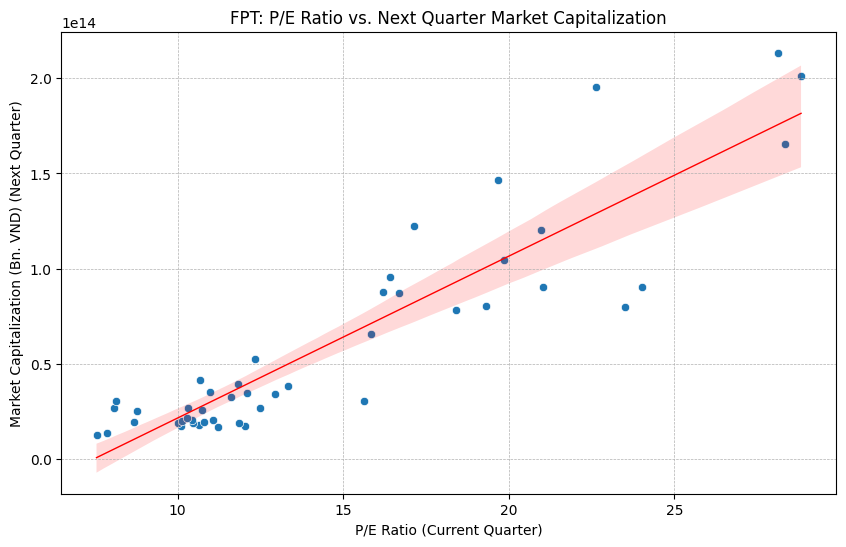


--- Conclusion ---
Based on the data from 2013Q1 to 2024Q3, the Pearson correlation coefficient between FPT's P/E ratio and its market capitalization in the subsequent quarter is 0.9098.
This strong, positive correlation is statistically significant (p=0.0000), suggesting that quarters with higher P/E ratios tend to be followed by quarters with higher market capitalization, and vice-versa.

Important Considerations:
- Market Capitalization is used as a proxy for stock price trend.
- Correlation does not imply causation. Other factors heavily influence stock prices.
- The analysis assumes a linear relationship. Non-linear relationships might exist.
- Outliers can influence correlation results. Visual inspection of the scatter plot is important.
- Data cleaning removed non-positive P/E values and rows without a corresponding next quarter value.


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import io

# --- Load ratiofpt.csv ---
# Use io.StringIO to simulate reading from a file
ratio_csv_data = """
,level_0,index,Meta,Meta,Meta,Chỉ tiêu cơ cấu nguồn vốn,Chỉ tiêu cơ cấu nguồn vốn,Chỉ tiêu cơ cấu nguồn vốn,Chỉ tiêu cơ cấu nguồn vốn,Chỉ tiêu hiệu quả hoạt động,Chỉ tiêu hiệu quả hoạt động,Chỉ tiêu hiệu quả hoạt động,Chỉ tiêu hiệu quả hoạt động,Chỉ tiêu hiệu quả hoạt động,Chỉ tiêu hiệu quả hoạt động,Chỉ tiêu hiệu quả hoạt động,Chỉ tiêu khả năng sinh lợi,Chỉ tiêu khả năng sinh lợi,Chỉ tiêu khả năng sinh lợi,Chỉ tiêu khả năng sinh lợi,Chỉ tiêu khả năng sinh lợi,Chỉ tiêu khả năng sinh lợi,Chỉ tiêu khả năng sinh lợi,Chỉ tiêu khả năng sinh lợi,Chỉ tiêu khả năng sinh lợi,Chỉ tiêu thanh khoản,Chỉ tiêu thanh khoản,Chỉ tiêu thanh khoản,Chỉ tiêu thanh khoản,Chỉ tiêu thanh khoản,Chỉ tiêu định giá,Chỉ tiêu định giá,Chỉ tiêu định giá,Chỉ tiêu định giá,Chỉ tiêu định giá,Chỉ tiêu định giá,Chỉ tiêu định giá,Chỉ tiêu định giá,Chỉ tiêu định giá
,,,ticker,yearReport,lengthReport,(ST+LT borrowings)/Equity,Debt/Equity,Fixed Asset-To-Equity,Owners' Equity/Charter Capital,Asset Turnover,Fixed Asset Turnover,Days Sales Outstanding,Days Inventory Outstanding,Days Payable Outstanding,Cash Cycle,Inventory Turnover,EBIT Margin (%),Gross Profit Margin (%),Net Profit Margin (%),ROE (%),ROIC (%),ROA (%),EBITDA (Bn. VND),EBIT (Bn. VND),Dividend yield (%),Current Ratio,Cash Ratio,Quick Ratio,Interest Coverage,Financial Leverage,Market Capital (Bn. VND),Outstanding Share (Mil. Shares),P/E,P/B,P/S,P/Cash Flow,EPS (VND),BVPS (VND),EV/EBITDA
0,0,0,FPT,2024,4,0.4323966744,1.0152519728,0.4146977693606577,2.42867844134561,0.9502185216,4.4167392296,56.89888947578124,17.3183367531,32.7558835349,106.97310976378122,21.0759269324,0.17337075977919722,0.36220102756806544,0.11896567710986726,0.2869088635,0.2073679279,0.1187874226,13043646259024.0,3052680751061,0.0177619893,1.307144972,0.2674070277,1.2538453067,-22.636886275407964,2.015251972775668,165642390005800.0,1471069183.0,20.9651613924,5.5600590275,2.6355698898,14.0739525836,1423.947963774998,20251.5835611764,13.6483472996
1,1,1,FPT,2024,3,0.4276736162,0.911017845,0.4083021084281542,2.403978319653577,0.9392979015,4.2751400198,60.21408773214811,19.5840872209,29.8434649459,109.6416398989481,18.6375803929,0.17526039753413206,0.38728697173933097,0.1313510425849962,0.2748693607,0.1957884492,0.1173968493,12360099630987.0,2787134855818,0.0137835975,1.37570569,0.2562391168,1.3092176333,-21.634886781859034,1.9110178450230828,213452138453300.0,1471069183.0,28.3455340663,7.1637230226,3.5616083847,20.6491642472,1419.955116011699,20254.8311180277,18.2712089212
2,2,2,FPT,2024,2,0.5187197449000001,0.9942986822,0.4330823626813625,2.2253503524251994,0.9255746359,4.2108340225,59.487799010561446,19.6349645861,29.7731936788,108.89595727546144,18.5892874112,0.1541785496658849,0.3706968442895303,0.12299973233369262,0.2774659628,0.1887322535,0.1143697508,11774915228161.0,2350486898150,0.0145348837,1.3024224746,0.2180397107,1.2423484694,-15.656821244896557,1.9942986821543711,200957653881600.0,1460448066.0,28.1416643471,7.31191482,3.4773588368,18.6931921964,1283.9612802342538,18818.5999682121,18.3333839464
3,3,3,FPT,2024,1,0.5369032819,0.9549439764,0.4354081149144998,2.1567375211043354,0.8984874901,4.1569719806,58.70880159230003,21.0759661403,29.7860464703,109.57081420290004,17.3183045356,0.1644828675973937,0.39100927204955954,0.1275839066762184,0.2720626617,0.1837301081,0.1106179394,11256374502773.0,2318045278330,0.0149476831,1.2977960117,0.2184210225,1.2338552566,-16.817693644803885,1.9549439763659822,195407951230800.0,1460448066.0,28.8279171018,7.2827494102,3.5509704342,18.981919749,1231.1501554811193,18372.1823261595,18.6977132149
4,4,4,FPT,2023,4,0.4761981467,1.0139245964,0.45555866660005523,2.0358223325254716,0.9401658512,4.098582203,59.12835003928585,21.7320308267,32.8414127729,113.70179363888585,16.7954851026,0.15899913436016988,0.383370002865002,0.11765496288229074,0.2809692595,0.1921742561,0.1155186956,10738142058051.0,2335762903222,0.0173160173,1.237898147,0.2792138079,1.1841605031,-11.303314277006296,2.014310173088183,146681405062500.0,1269968875.0,22.642104984,5.8739745349,2.7876711681,15.3813227434,1360.9782061272958,19663.0065918316,15.2176525049
5,5,5,FPT,2023,3,0.6788096442,1.1866306189,0.4668696646793431,1.9309530753522692,0.9059963512,4.117917757,58.831772853407486,24.7974640132,32.5506996482,116.17993651480748,14.7192470894,0.16630813652136248,0.399394769824509,0.12638952133580605,0.2666664749,0.1700554532,0.1083166686,10190190787133.0,2288690162217,0.0211193242,1.1961103323,0.2164458448,1.1429325585,-8.615276695306305,2.18663061885836,120266052462500.0,1269968875.0,19.667627301,5.0892620992,2.3595498225,15.8873510767,1369.5929045851615,18607.8056412642,13.443709215
6,6,6,FPT,2023,2,0.6901950974,1.116583337,0.42777152537844265,1.9438465718348203,0.8870838308,4.0607773049,58.556699784196894,27.2713938412,34.5525437928,120.3806374181969,13.3839877098,0.15378989063894247,0.371170226109497,0.1208887772912838,0.2650069693,0.1570804839,0.1065471408,9565749710738.0,1919969014996,0.020746888,1.2388053144,0.1993315784,1.1739776019,-9.040934275755742,2.116583336996022,122424999550000.0,1269968875.0,20.9751763439,5.06979766,2.5317055868,18.2960490435,1188.3909605603524,19014.5655634458,14.6517540986
7,7,7,FPT,2023,1,0.4681637933,0.8750535967,0.4428282766349233,1.8395585691492253,0.8599493288,3.9941626741,58.463266862364506,29.2484639673,36.0050318428,123.71676267246451,12.4792878152,0.16038474743619044,0.3910393666986681,0.127858414302857,0.2672111184,0.183142489,0.1038204213,9132115477728.0,1873515001905,0.026560425,1.2812500973,0.1427484441,1.1907556405,-12.660111102354382,1.875053596711558,95629596784500.0,1269981365.0,17.1417055282,4.2203580624,2.0803322783,17.5321131867,1176.0507847215538,17842.0880140332,11.954377051
8,8,8,FPT,2022,4,0.5466137149,1.0369991223,0.47480267162059003,1.7227592718690647,0.8355048736,3.9238599532,58.893408834098715,25.4583395255,41.3039624886,125.65571084819871,14.3371487223,0.15320123721834925,0.40186340142648425,0.10363110955896346,0.227053325,0.1800440751,0.1008104799,8627621794997.0,1998115841063,0.0251256281,1.2616739557,0.2626375232,1.1815069652,-12.760722578034853,2.0382530832971932,87323315131200.0,1097026572.0,16.4103429545,4.1490721109,1.9841911453,17.2425017899,1232.058675982554,19185.0124252177,12.2950674214
9,9,9,FPT,2022,3,0.8485782384999999,1.29163753,0.47324782722538494,1.6352574445586765,0.755324685,3.8785732595,57.69438479746345,29.3391240595,38.2071989644,125.24070782136346,12.4407258806,0.15846572493743336,0.39103579972068575,0.13039499349782072,0.228420619,0.1468530585,0.0950511804,8015842349776.0,1766664487168,0.025,1.2289931657,0.1302289333,1.1527451052,-10.607900672666295,2.2916375299593263,87762125760000.0,1097026572.0,16.6715161989,4.4112021489,2.1056713484,14.6961003063,1325.1422691783257,18135.645862424,13.2881857747
10,10,10,FPT,2022,2,1.0253419789,1.404593247,0.4542560880992148,1.5914732915300966,0.7343030372,3.9213986148,58.30547326924258,30.1030767709,37.6861325284,126.0946825685426,12.1250064496,0.15656652808856775,0.3806126661974921,0.12389194076629031,0.223164695,0.1288527303,0.0919584394,7582533147723.0,1580705075815,0.0273972603,1.2217132483,0.1716182096,1.1491377693,-8.94164083395172,2.4045932469639855,80082939756000.0,1097026572.0,16.2049442826,4.0943398103,2.0400416513,16.8800262028,1140.1915967100203,17829.4922705528,13.264402749
11,11,11,FPT,2022,1,1.0859778911,1.4217224707,0.46019043116922675,1.560728897519567,0.7393032413,4.010718098,58.30844156147082,30.1654652684,41.0149822651,129.48888909497083,12.0999293978,0.1454901982059856,0.406291691437412,0.1273224157147916,0.2201605993,0.125877423,0.0912418456,7435707396381.0,1415656560415,0.0242424242,1.215004501,0.1601267714,1.1538883813,-9.708264115162246,2.421722470700881,90504692190000.0,1097026572.0,19.3016588404,4.7014883596,2.3942287334,18.8145649595,1129.3066700539318,17547.6346402984,15.0838897902
12,12,12,FPT,2021,4,1.0454792052,1.5071424935,0.4854694455593869,1.456095803646782,0.747278981,3.8102163592,60.27337727812472,25.0930897234,47.1495774312,132.5160444327247,14.5458372812,0.1365421010430737,0.38250624955733525,0.1215914929086724,0.2167424308,0.1304394203,0.0909003243,7058943201555.0,1461554245850,0.0173913043,1.1800089976,0.1820444874,1.1293609169,-10.587037947371027,2.5068254332284345,104368439635000.0,907551649.0,24.0258423086,5.8173326389,2.9269896842,17.8451100002,1434.1025175394727,19768.510267122,17.0031297998
13,13,13,FPT,2021,3,0.9634075676,1.3737729673,0.41541525360370046,1.3815892172375146,0.7411425578,4.0231012043,60.320645120926734,32.0270918192,45.1617816362,137.50951857632674,11.3966014167,0.1576805348800778,0.37259193859523754,0.12891880451802193,0.2039699037,0.136763133,0.0884844578,6782810176201.0,1375789781096,0.0,1.1840134061,0.2103721692,1.1085022892,-11.450701695629212,2.3737729673439554,79955300276900.0,907551649.0,19.8599175213,4.7078132375,2.3782126916,15.0130068526,1239.421182415812,18713.5715789493,14.0960731119
14,14,14,FPT,2021,2,0.9453655367,1.3422876737,0.4134446102476302,1.3634660031448025,0.759184616,4.0279518646,60.58129929735315,30.2744211206,47.6058133124,138.46153373035315,12.0563824671,0.17301050102300114,0.39809045012987365,0.11572147065656067,0.1994414714,0.135019253,0.0893277464,6558900120558.0,1495106107041,0.0,1.1858639057,0.1992376714,1.1118490129,-12.005948211397936,2.3422876736687246,90202445736200.0,907469273.0,23.522562588,5.3733905515,2.7799190238,15.8548712711,1101.9999307271312,18498.5623224964,16.1087797297
15,15,15,FPT,2021,1,0.9200801700353622,1.25411057472229,0.4243843524382314,1.341221789962682,0.770164430141449,3.9348347187042236,62.29129548333461,28.87016487121582,45.79838943481445,136.95984978936488,12.642809867858887,0.1424468450955471,0.3815452061386575,0.11944417913450006,0.1986926645040512,0.1279441863298416,0.09247589111328125,6148557111296.0,1080648442446,0.0,1.2149723768234253,0.2247770130634308,1.1436351537704468,-10.826273379391298,2.254110553081297,78133104405300.0,907469273.0,21.0479281538,4.6814369436,2.5379292535,13.0048694838,998.5381413382578,18391.7888965845,15.051003421
16,16,16,FPT,2020,4,0.7211783233,1.2430973497,0.4471389989075687,1.264570946587493,0.7941168928,3.7736139338,69.60559509041691,27.9071104707,55.370733354,152.88343891511693,13.0791039934,0.1450628642307157,0.4004891253644266,0.11340454487272467,0.199859458,0.1469006608,0.0941855175,6095337155480.0,1257216994600,0.0240963855,1.1452189168,0.2095350786,1.0875346681,-12.756679239699919,2.244265987352304,65496534874000.0,789114878.0,18.3919782379,4.1459614557,2.1956304212,10.2640781964,1245.5014087074405,20019.4818229039,12.3565715696
17,17,17,FPT,2020,3,0.6469349775,1.0767077663,0.39814261667051565,1.2359310640027865,0.8263781832,3.9804167683,66.57928233024012,27.5073314723,45.2009289893,139.2875427918401,13.2691897201,0.15785984060170494,0.39702464881423843,0.12298053715585842,0.1876700821,0.1500402395,0.0934613973,5828684472903.0,1192335661697,0.0298507463,1.2113821796,0.2321488713,1.1415481286,-13.897994246455625,2.0767077663258813,52521642370000.0,783905110.0,15.8258042228,3.4868441615,1.7935340391,8.4943306986,1184.9492863211467,19215.0830084817,10.6958229749
18,18,18,FPT,2020,2,0.6243637107,1.005884623,0.41142253201713896,1.217055336344708,0.8464424442,3.9266060022,69.01347170435031,28.4684987356,45.5147646093,142.99673504925033,12.8211889004,0.15796324638690212,0.3899360601374374,0.1258897138962851,0.1947649313,0.1548870652,0.0981369059,5803294105067.0,1102583854426,0.0378787879,1.2344039429,0.2460278533,1.1578845028,-10.877223322420585,2.0058846229968585,41390189808000.0,783905110.0,12.3415216618,2.7668582374,1.4354084978,7.8988598778,1120.939902421353,19083.0159948096,8.824492402
19,19,19,FPT,2020,1,0.6051200187,0.9520886482,0.415861719950201,1.1984949233669726,0.8775793069,3.9666706773,70.63270874650475,29.5469663498,45.9205706699,146.10024576620475,12.3532140552,0.158375423669332,0.3958001186292345,0.11267594074106907,0.1956760869,0.1583495375,0.0996313385,5745180368768.0,1050118527016,0.0448933782,1.236096358,0.245704483,1.159708679,-10.540616894846849,1.9520886482008888,34922972650500.0,783905110.0,10.6802569925,2.3692261841,1.2176324853,8.5918268349,953.0555797002012,18803.6078185496,7.6258056778
20,20,20,FPT,2019,4,0.4889000753,0.9878319533,0.4439303790701831,1.1471120632677274,0.877796348,3.9578967666,74.89433555956639,29.5270730921,55.2913150771,159.71272372876638,12.3615367789,0.12742493345000958,0.3781967024772897,0.09325323723165403,0.1986016686,0.1681421008,0.0992965713,5501450664844.0,1034714399471,0.0394477318,1.1786655898,0.2144661235,1.0989127488,-8.569286240659146,1.9946143934602705,34560572771400.0,681668102.0,10.9693595133,2.4749405959,1.246910649,8.8214903769,1110.8541003698015,20485.3401672666,7.7532410565
21,21,21,FPT,2019,3,0.5592274031000001,0.9861279617,0.4421189829317452,1.104715575036283,0.876741122,3.8895550026,73.83011534428938,33.5044744636,46.9001585643,154.2347483721894,10.8940673102,0.16787086575897292,0.39169182469244035,0.13514322194383288,0.2030132131,0.1578555784,0.1045045737,5223017664979.0,1192617437145,0.0353982301,1.1965324619,0.2097027003,1.1040154679,-11.866141273058975,1.9861279616721472,38322611628000.0,678276312.0,12.0830594228,2.8220254113,1.4434553356,11.9985839157,1415.5116342055005,20021.0812323326,8.886838031
22,22,22,FPT,2019,2,0.4953566208,0.9218550717,0.43743998291867786,1.074418256143158,0.8716569725,3.96281366,75.44854528110467,35.0734300099,47.8432369596,158.36521225060469,10.4067380891,0.15827807389257226,0.3776970868945193,0.11598501804204087,0.1944310763,0.1552347021,0.100209183,4881708506520.0,1080393236621,0.0346020761,1.2644861151,0.2182620296,1.1576186747,-14.92472612245002,1.9218550716939815,39204370833600.0,678276312.0,13.3380377083,2.9448058899,1.5385785117,12.3561323545,1167.2297398895453,19627.7792697189,9.457146938
23,23,23,FPT,2019,1,0.46861337329999997,0.8508182178,0.43073423814685974,1.0558825766740298,0.855334178,3.9842143467,75.24631573047554,35.0538579573,47.329648628,157.62982231577556,10.4125486115,0.14297333472448684,0.4022480365421747,0.11052793246541985,0.187294231,0.1453089179,0.0968427628,4473307925781.0,810155486857,0.0418410042,1.3312048006,0.2107300132,1.2158953271,-11.143378829543595,1.8508182178018082,32421607713600.0,678276312.0,11.8322510721,2.4770216743,1.3436642492,9.5882150198,923.3763073256198,19297.3684875951,8.745029054
24,24,24,FPT,2018,4,0.4962754655,1.0140186822,0.4412260163990851,1.003542835453783,0.8478786408,3.9475378281,84.60448996950805,30.5455943997,60.3178155698,175.46789993900805,11.9493500511,0.12197408108633266,0.36982819137108175,0.1131199543754312,0.187066446,0.1435909114,0.0957024994,4286449299991.0,848018283943,0.0403632694,1.2736762983,0.2716550038,1.1809025594,-11.335414415079645,2.013568663048784,30553600081800.0,616621596.0,11.6044385987,2.4435468424,1.3161975389,8.4735199955,1275.4344739119388,20277.9006071562,8.371182923
25,25,25,FPT,2018,3,0.5168358749,0.9824389761,0.39547684328715105,0.9628920859499781,1.1017608384,5.3563361905,59.46617031968447,23.1825635117,34.3245633155,116.97329714688448,15.7445918272,0.14698462333403822,0.380326015386099,0.12009788714694734,0.2354154541,0.1485216357,0.1244352955,4313081825014.0,887207848753,0.0347222222,1.3070021461,0.2980629372,1.1913408723,-14.301578869190921,1.9824389760828742,26505549907200.0,613554396.0,8.1434833081,2.2325216266,0.9217132799,9.2019958813,1181.5055508134603,19350.316469963,7.3809406585
26,26,26,FPT,2018,2,0.0,0.0,0.39024448121776406,0.9439100111360296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.13133226195701067,0.3654688673591058,0.10855933955393114,0.0,0.0,0.0,0.0,718947306103,0.0365853659,0.0,0.0,0.0,-13.050709311172131,1.8930549400669887,25155730236000.0,613554396.0,8.0738975063,2.1387875485,0.7497542675,8.9032332122,968.5895003725146,19169.7394298712,6.5361769675
27,27,27,FPT,2018,1,0.430043577,0.7993679377,0.37338097714098123,0.9448798535505722,1.4112428964,7.5629509602,49.38596863984602,34.8165666461,32.6373216803,116.83985696624603,10.4835150378,0.13943563538059425,0.3905810782420806,0.10714344640282303,0.2311204592,0.1635366381,0.1121954873,4242880876661.0,662426439907,0.0346420323,1.5100191904,0.2922991955,1.3977829515,-14.273781578775065,1.799367937747448,26566905346800.0,613554396.0,8.7630467058,1.9245976182,0.6986803404,9.5535771899,829.6146607855125,22498.2092835821,6.8293945632
28,28,28,FPT,2017,4,0.39637854759999996,0.8884247172,0.3977686226832765,0.8996815679891107,1.5559483714,8.6728571203,43.876307039044335,31.219359101,33.4079995343,108.50366567434432,11.6914635825,0.0702360649933812,0.22811155003710787,0.11361037851489639,0.2375011948,0.1767040739,0.1069259074,4206055335364.0,877651420842,0.0263157895,1.4467963112,0.3135631908,1.3548881365,-12.462678448205475,1.8908454842838223,30411397245000.0,533533285.0,10.3238834602,2.648071374,0.7129017248,15.2223275541,2660.83764663155,21525.099572738,8.0289070788
29,29,29,FPT,2017,3,0.7096066513,1.2782103394,0.37639941202068766,0.886007716630075,1.4731836769,9.106494199,45.02200839736918,50.3915490171,34.6689707425,130.08252815696918,7.2432780321,0.07711581602463534,0.223044266850639,0.05379281686243091,0.1784203136,0.1526543634,0.0749936495,4300245202571.0,835256675182,0.03125,1.3803766682,0.3312978698,1.1017032851,-9.812780495889811,2.2782103394213253,33976238656000.0,530878729.0,15.6354589847,3.1965960287,0.7976467993,16.4670663663,1097.5023495978119,20021.2974754959,8.6820325605
30,30,30,FPT,2017,2,0.8084128503000001,1.3082537355,0.3909883226461329,0.8259452288495802,1.4780933367,9.0869426612,44.03849592134321,52.1270139561,35.1718363892,131.3373462666432,7.00212754,0.07991450624707486,0.2444608679802332,0.05144274496221091,0.1764887544,0.1550969539,0.0731054804,4263480131270.0,794885826968,0.0398406375,1.3719979327,0.3106166224,1.0884915784,-7.938370019478215,2.3082537355310486,26650112195800.0,530878729.0,12.9354978307,2.6638095042,0.6418669383,9.8712910433,963.846650943892,18845.191414776,7.2539969868
31,31,31,FPT,2017,1,0.9124588543000001,1.3374634514,0.3733012553039728,0.814406096929909,1.4784587183,9.0009893808,43.59222610332377,54.5061308122,34.4149767201,132.51333363562378,6.6964944046,0.06944724282516355,0.2203744998261124,0.043841011399932545,0.1816262325,0.1457579322,0.0750332971,4157293690482.0,654062436569,0.0411946447,1.3659712358,0.27204371,1.0400597895,-5.794731358296051,2.3374634513609283,25774162292950.0,530878729.0,12.4933744177,2.2415165183,0.6359043599,9.3110295145,777.7668698607813,21659.4433292146,7.6134109821
32,32,32,FPT,2016,4,0.932214474,1.6059631094,0.40017016317561144,0.7782102118248915,1.4148991402,8.9012422523,45.12897147126196,58.3952753796,38.5763611253,142.10060797616197,6.2505056724,0.08191139767279194,0.22477609125385611,0.05331942805921744,0.184060042,0.0,0.0712485159,3981961763710.0,1015666362329,0.0430570506,1.2569762334,0.3450074687,0.9957083944,-9.907717029241299,2.6128953964134207,21443209493100.0,461640678.0,10.7203421164,2.2404298334,0.5424339196,4.9494572692,1432.1488049738114,20732.6287601462,6.37103354
33,33,33,FPT,2016,3,0.8506939198,1.4078474555,0.4079577959741777,0.7452599192002787,1.4695948127,8.5153078565,43.87428160905501,61.1208860806,34.0542674282,139.049435117855,5.9717720636,0.08131494327875954,0.2272184039344349,0.04795463505939282,0.1865348119,0.0,0.0777584165,3822588657564.0,793250718856,0.0447427293,1.3183112559,0.3258838604,1.0070909813,-7.605778780610452,2.4078474554737594,20532690567600.0,459344308.0,10.2904299035,2.2670496717,0.5456558903,5.8990477369,1018.4327629199663,19717.2565547542,6.3795771508
34,34,34,FPT,2016,2,0.8405240407,1.3229690618,0.41116618422348716,0.7416641549120807,1.5005588463,8.3200812977,42.27638977691038,61.6743427446,32.5813975452,136.53213006671038,5.9181822417,0.08140085920816635,0.21583352731285801,0.057599103973113124,0.18341493,0.0,0.0767210399,3583022405873.0,729231748851,0.0458715596,1.3378760312,0.2912694042,0.9851200923,-6.798909414633431,2.322969061802602,20027411828800.0,459344308.0,10.438951443,2.2084731812,0.5354700889,8.3503729932,1123.3470981336293,19742.1460090072,6.8288361751
35,35,35,FPT,2016,1,0.8422686975,1.3203316243,0.412132472699074,0.7234921887591469,1.5585957282,8.4526449636,40.8246287942115,60.9881375813,34.4379224644,136.2506888399115,5.984770391,0.060281362518265366,0.19915522472540687,0.040830248544387354,0.1821070916,0.0,0.0764924398,3574675631853.0,510373256560,0.0487804878,1.3485892366,0.264900039,0.9555901779,-7.999355283005301,2.3203316243453846,18833116628000.0,459344308.0,10.1284662732,1.8241772206,0.4686323635,10.7063157948,752.5728280124895,22475.8864090818,6.1484852148
36,36,36,FPT,2015,4,0.0,0.0,0.42553631282407595,0.6918938308808281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08066466984324454,0.20659122859826054,0.06338933237338201,0.0,0.0,0.0,0.0,842868586323,0.0411522634,0.0,0.0,0.0,-8.017088955357888,2.5528197871358973,19412594119800.0,399436093.0,10.0057374909,2.2514959793,0.51140011,16.7144977274,1658.2323370512238,21585.6481412549,6.404098345
37,37,37,FPT,2015,3,0.0,0.0,0.47911235835029387,0.6778859028015544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07321686314468966,0.20095554536246887,0.040836050904992933,0.0,0.0,0.0,0.0,697570991677,0.0426439232,0.0,0.0,0.0,-12.722679017945325,2.374323752893227,18640370481600.0,397449264.0,10.8065047947,2.2104266495,0.3632322352,13.5235218697,978.9022649945076,21217.6233082504,6.692839089
38,38,38,FPT,2015,2,0.6527483613999999,1.2754053784,0.4412522405732035,0.6746258125702305,2.5296187439,14.2091910542,25.05062373605245,34.7878609334,22.1401944019,81.97867907135245,10.4921656637,0.08009905843621522,0.1931612877497919,0.04895012312428871,0.2033951376,0.0,0.0787669025,3311341428431.0,747207263848,0.0388349515,1.3161707429,0.3439730998,0.9263429752,-11.383040085309123,2.2754053784415205,20468637096000.0,397449264.0,11.8530347627,2.412595698,0.3703537339,17.9178482916,1148.9093547623227,21346.3035027485,7.5787967007
39,39,39,FPT,2015,1,0.0,0.0,0.4763895788482275,0.5697121755668646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07641484932329973,0.19553567124573237,0.04914213305228454,0.0,0.0,0.0,0.0,660337502954,0.0422832981,0.0,0.0,0.0,-16.168302885383437,2.6496158555505955,18799350187200.0,397449264.0,11.0772923824,1.941339278,0.3467949337,17.0522131971,1068.4655116105587,24364.6231940283,7.3134765714
40,40,40,FPT,2014,4,0.885497738,1.6934084286,0.48518244885994144,0.5377034488538396,1.6229454636,9.4435354608,42.84276687650449,55.4059185691,36.1168906221,134.3655760677045,6.5877438625,0.041231789991778935,0.11531950117643945,0.02938259051153716,0.2158555798,0.0,0.0811399286,3172663135327.0,632214924948,0.0403225806,1.2992993994,0.4432400973,0.9490808827,-6.875429101717206,2.8646921740894493,17057153510400.0,343894224.0,10.4516293202,2.1560085235,0.5225098197,14.8195987179,1310.0798173743099,23005.4749125958,6.1732686086
41,41,41,FPT,2014,3,0.7025005393,1.4403071706,0.43897960094986876,0.5185909144832518,2.5455189327,14.331382013,28.359324329827064,33.0392530134,20.5516961739,81.95027351712706,11.0474652635,0.04231369877116346,0.1192131134147146,0.028870798416730584,0.2202925231,0.0,0.0908103558,2926429700958.0,570270811896,0.0412371134,1.3914158276,0.4533637336,1.018192744,-11.592225330740948,2.61452145043874,16678869864000.0,343894224.0,10.0953500974,2.1862942805,0.3601307401,38.1716014141,1131.4466125810825,22183.6558929847,6.089846138
42,42,42,FPT,2014,2,0.5297310517999999,1.1709829307,0.4434718347998203,0.5158029032390518,2.6166907443,14.3281131776,28.259718027236392,31.3700756029,18.4809269331,78.11072056323638,11.6352923282,0.05994763794147595,0.14543226940738965,0.04001582687313977,0.2177517904,0.0,0.0930091154,3074429581827.0,640565150553,0.0384615384,1.4800349088,0.4152309243,1.0642593093,-13.567760850413261,2.34143771240058,17882499648000.0,343894224.0,11.2212472962,2.3567382214,0.3988356879,22.2685772915,1243.3635904597222,22064.3937147633,6.3183560349
43,43,43,FPT,2014,1,0.6066838152,1.1500021521,0.4170795862979933,0.5148638192628089,2.6238382004,14.5559982756,28.31438957540853,30.9744125792,17.562047288,76.85084944260853,11.7839200038,0.05009433149776222,0.12377094194565517,0.033266465656748276,0.2246915643,0.0,0.0971936459,3019047567588.0,544391214498,0.0400801603,1.5058460633,0.4747808611,1.0885505531,-15.332124873431296,2.303438290138064,17160321777600.0,343894224.0,10.6461298624,2.2656872229,0.3945998308,-57.20160294,1051.245871736421,22024.2227144588,6.1372848261
44,44,44,FPT,2013,4,0.593375727,1.2924308091,0.42353974428746605,0.49009631693474204,1.7009509097,9.4942545349,46.367053129816334,51.5013769884,34.0510631425,131.91949326071634,7.087189146,0.048909571502176695,0.1451787332276919,0.042009397202819924,0.2401280035,0.0,0.1011781861,3091107119426.0,551867578632,0.0425531914,1.4233778119,0.4635512705,1.0563057692,-16.61875790022522,2.443656974669405,19395916219500.0,275119379.0,12.0403469753,2.6906392684,0.7176260201,13.8253945387,1722.9246718421823,26201.9516424977,6.7506510947
45,45,45,FPT,2013,3,0.5420764651,1.1095016426,0.4257785474416745,0.469325907998985,2.6841957231,14.4026744264,28.246375234764784,30.703610105,17.6561104195,76.60609575926478,11.887852886,0.04596127823024232,0.11216731628613104,0.02754777968124983,0.2379534229,0.0,0.1062861507,3058367629321.0,551562887781,0.04,1.5273427141,0.4759582901,1.1426612222,-16.335072920208688,2.275320662663901,13755968950000.0,275119379.0,8.6675507548,1.9924322382,0.3441661687,25.3426019933,1201.6233440647595,25094.9563258792,4.9438405834
46,46,46,FPT,2013,2,0.5110097808,1.0627016724,0.4003470996805938,0.47515219751292964,2.5852378256,14.6058090419,27.96644999518066,31.8975071946,17.7383455631,77.60230275288066,11.4429004678,0.07290287110660885,0.14622154884356303,0.047639128202394986,0.2460781746,0.0,0.10866635,2980853142208.0,680662144290,0.0444444444,1.572402642,0.492150244,1.1528915835,-22.73702176240896,2.2208587284384604,12380372055000.0,275119379.0,7.8518400007,1.771731363,0.3271931369,49.7399300561,1616.7005571933921,25398.8843565333,4.6121607876
47,47,47,FPT,2013,1,0.443069726,0.9992586082,0.42041093343290564,0.44381583559099,2.6585934826,15.6849741212,26.01840770805332,31.6146354967,15.3474484059,72.98049161065332,11.5452857281,0.06410132880501013,0.1385635236591096,0.04161201899122865,0.2497580693,0.0,0.1085234676,3099733991994.0,551979062724,0.0464037122,1.5762018512,0.4384745015,1.0976996952,-15.512956659341242,2.153371687346669,11857645234900.0,275119379.0,7.5467254396,1.8078078712,0.3106684426,309.1434189582,1302.426361125219,23841.0290638449,4.1265651835
48,48,48,FPT,2007,2,0.0,0.0,0.18632382981108037,0.13065610643418665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046048561929641345,0.09245363612456696,0.03474500108277257,0.0,0.0,0.0,0.0,279540664391,0.0,0.0,0.0,0.0,-25.225757760255913,2.0128305401370667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,49,49,FPT,2007,1,0.0,0.0,0.1920400504236813,0.11470173170883426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029264400280595137,0.07114425092934402,0.027376059751463795,0.0,0.0,0.0,0.0,165741410239,0.0,0.0,0.0,0.0,-17.246785240632708,1.9610706226260497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""
df_ratio = pd.read_csv(io.StringIO(ratio_csv_data), header=[0,1])

# Flatten MultiIndex columns
df_ratio.columns = [' | '.join(col).strip() if isinstance(col, tuple) and col[1] else col[0] for col in df_ratio.columns.values]
df_ratio = df_ratio.rename(columns={'Unnamed: 0 | ':'row_num', 'Unnamed: 1 | level_0':'level_0', 'Unnamed: 2 | index':'old_index'})

# --- Load quarterly_volume_fpt.csv (Not strictly needed for this analysis, but loaded) ---
volume_csv_data = """
,Quarter,volume,yearReport,lengthReport
0,2008Q1,14391200,2008,1
1,2008Q2,8257150,2008,2
2,2008Q3,23286260,2008,3
3,2008Q4,26009610,2008,4
4,2009Q1,19593960,2009,1
5,2009Q2,56883530,2009,2
6,2009Q3,28901950,2009,3
7,2009Q4,21207630,2009,4
8,2010Q1,13538970,2010,1
9,2010Q2,13604470,2010,2
10,2010Q3,13942470,2010,3
11,2010Q4,18880870,2010,4
12,2011Q1,16696150,2011,1
13,2011Q2,12581690,2011,2
14,2011Q3,18957310,2011,3
15,2011Q4,14218740,2011,4
16,2012Q1,8950420,2012,1
17,2012Q2,9517770,2012,2
18,2012Q3,10785710,2012,3
19,2012Q4,5221150,2012,4
20,2013Q1,15563380,2013,1
21,2013Q2,16727040,2013,2
22,2013Q3,14499780,2013,3
23,2013Q4,18649160,2013,4
24,2014Q1,50699510,2014,1
25,2014Q2,57279590,2014,2
26,2014Q3,89638330,2014,3
27,2014Q4,29693080,2014,4
28,2015Q1,18619830,2015,1
29,2015Q2,36463140,2015,2
30,2015Q3,45418080,2015,3
31,2015Q4,82313330,2015,4
32,2016Q1,43108280,2016,1
33,2016Q2,39159920,2016,2
34,2016Q3,70476940,2016,3
35,2016Q4,38901300,2016,4
36,2017Q1,51862990,2017,1
37,2017Q2,59801420,2017,2
38,2017Q3,59083940,2017,3
39,2017Q4,129393810,2017,4
40,2018Q1,133930610,2018,1
41,2018Q2,84343680,2018,2
42,2018Q3,61515400,2018,3
43,2018Q4,38824210,2018,4
44,2019Q1,35704070,2019,1
45,2019Q2,65670340,2019,2
46,2019Q3,110259890,2019,3
47,2019Q4,101722100,2019,4
48,2020Q1,110216670,2020,1
49,2020Q2,120006140,2020,2
50,2020Q3,108114170,2020,3
51,2020Q4,144031780,2020,4
52,2021Q1,145640500,2021,1
53,2021Q2,153073700,2021,2
54,2021Q3,185704600,2021,3
55,2021Q4,125382300,2021,4
56,2022Q1,89327300,2022,1
57,2022Q2,170205700,2022,2
58,2022Q3,95877368,2022,3
59,2022Q4,78319148,2022,4
60,2023Q1,47021554,2023,1
61,2023Q2,47073130,2023,2
62,2023Q3,127939567,2023,3
63,2023Q4,149378530,2023,4
64,2024Q1,150063265,2024,1
65,2024Q2,300576894,2024,2
66,2024Q3,301174187,2024,3
67,2024Q4,250832943,2024,4
68,2025Q1,285962600,2025,1
69,2025Q2,77973600,2025,2
"""
df_volume = pd.read_csv(io.StringIO(volume_csv_data), index_col=0)


# --- Prepare ratio data ---
# Select relevant columns and rename for clarity
df_analysis = df_ratio[['Meta | yearReport', 'Meta | lengthReport', 'Chỉ tiêu định giá | P/E', 'Chỉ tiêu định giá | Market Capital (Bn. VND)']].copy()
df_analysis.rename(columns={
    'Meta | yearReport': 'Year',
    'Meta | lengthReport': 'QuarterNum',
    'Chỉ tiêu định giá | P/E': 'PE',
    'Chỉ tiêu định giá | Market Capital (Bn. VND)': 'MarketCap'
}, inplace=True)

# Convert to numeric, coercing errors to NaN
df_analysis['Year'] = pd.to_numeric(df_analysis['Year'], errors='coerce')
df_analysis['QuarterNum'] = pd.to_numeric(df_analysis['QuarterNum'], errors='coerce')
df_analysis['PE'] = pd.to_numeric(df_analysis['PE'], errors='coerce')
df_analysis['MarketCap'] = pd.to_numeric(df_analysis['MarketCap'], errors='coerce')

# Create a Quarter string identifier
df_analysis['Quarter'] = df_analysis['Year'].astype(int).astype(str) + 'Q' + df_analysis['QuarterNum'].astype(int).astype(str)

# Sort chronologically
df_analysis.sort_values(by=['Year', 'QuarterNum'], inplace=True)
df_analysis.reset_index(drop=True, inplace=True)

# --- Create Lagged Variable ---
# Shift the MarketCap column up by one row to get the *next* quarter's MarketCap
df_analysis['Next_Quarter_MarketCap'] = df_analysis['MarketCap'].shift(-1)

# --- Clean Data ---
# Remove rows with missing essential data or invalid PE
# We need PE for the current quarter and MarketCap for the next quarter
initial_rows = len(df_analysis)
df_analysis.dropna(subset=['PE', 'Next_Quarter_MarketCap'], inplace=True)
# Remove rows with non-positive P/E (often indicates losses or data issues)
df_analysis = df_analysis[df_analysis['PE'] > 0]
cleaned_rows = len(df_analysis)

print(f"Initial data rows: {initial_rows}")
print(f"Rows after cleaning (removing NaNs in PE/Next_Quarter_MarketCap and PE <= 0): {cleaned_rows}")
#print("\nSample of data used for analysis:")
#print(df_analysis[['Quarter', 'PE', 'MarketCap', 'Next_Quarter_MarketCap']].head())
#print(df_analysis[['Quarter', 'PE', 'MarketCap', 'Next_Quarter_MarketCap']].tail())


# --- Correlation Analysis ---
# Calculate Pearson correlation and p-value
correlation, p_value = pearsonr(df_analysis['PE'], df_analysis['Next_Quarter_MarketCap'])

print(f"\n--- Correlation Analysis ---")
print(f"Pearson Correlation between P/E and Next Quarter's Market Cap: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret significance (using alpha = 0.05)
if p_value < 0.05:
    print("The correlation is statistically significant (p < 0.05).")
else:
    print("The correlation is not statistically significant (p >= 0.05).")

# Interpret correlation strength and direction
if abs(correlation) > 0.7:
    strength = "strong"
elif abs(correlation) > 0.4:
    strength = "moderate"
elif abs(correlation) > 0.1:
     strength = "weak"
else:
     strength = "very weak or no"

direction = "positive" if correlation > 0 else "negative" if correlation < 0 else "neutral"

if strength != "very weak or no":
    print(f"The analysis suggests a {strength}, {direction} linear relationship.")
else:
     print(f"The analysis suggests a {strength} linear relationship.")


# --- Visualization ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_analysis, x='PE', y='Next_Quarter_MarketCap')
sns.regplot(data=df_analysis, x='PE', y='Next_Quarter_MarketCap', scatter=False, color='red', line_kws={'linewidth':1}) # Add regression line
plt.title('FPT: P/E Ratio vs. Next Quarter Market Capitalization')
plt.xlabel('P/E Ratio (Current Quarter)')
plt.ylabel('Market Capitalization (Bn. VND) (Next Quarter)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# --- Conclusion ---
print("\n--- Conclusion ---")
print(f"Based on the data from {df_analysis['Quarter'].iloc[0]} to {df_analysis['Quarter'].iloc[-1]}, the Pearson correlation coefficient between FPT's P/E ratio and its market capitalization in the subsequent quarter is {correlation:.4f}.")
if p_value < 0.05:
    print(f"This {strength}, {direction} correlation is statistically significant (p={p_value:.4f}), suggesting that quarters with higher P/E ratios tend to be followed by quarters with {'higher' if direction == 'positive' else 'lower'} market capitalization, and vice-versa.")
else:
    print(f"However, this correlation is not statistically significant (p={p_value:.4f}), meaning we cannot confidently conclude from this data that a linear relationship exists between the current P/E ratio and the next quarter's market capitalization. The observed {strength} relationship could be due to random chance.")

print("\nImportant Considerations:")
print("- Market Capitalization is used as a proxy for stock price trend.")
print("- Correlation does not imply causation. Other factors heavily influence stock prices.")
print("- The analysis assumes a linear relationship. Non-linear relationships might exist.")
print("- Outliers can influence correlation results. Visual inspection of the scatter plot is important.")
print("- Data cleaning removed non-positive P/E values and rows without a corresponding next quarter value.")

In [102]:
FPT_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 39 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   (level_0, )                                                  50 non-null     int64  
 1   (index, )                                                    50 non-null     int64  
 2   (Meta, ticker)                                               50 non-null     object 
 3   (Meta, yearReport)                                           50 non-null     int64  
 4   (Meta, lengthReport)                                         50 non-null     int64  
 5   (Chỉ tiêu cơ cấu nguồn vốn, (ST+LT borrowings)/Equity)       50 non-null     float64
 6   (Chỉ tiêu cơ cấu nguồn vốn, Debt/Equity)                     50 non-null     float64
 7   (Chỉ tiêu cơ cấu nguồn vốn, Fixed Asset-To-Equity)           50 non-null     float

In [104]:
correlation, p_value = pearsonr(FPT_ratio['Chỉ tiêu định giá']['P/E'], FPT_ratio['Chỉ tiêu định giá']['P/B'])
print(correlation, p_value)


0.9854334060725498 1.3623609230000158e-38


In [87]:
df_high=FPT_stock[['time','open','high','close']]
df_low=FPT_stock[['time','open','low','close']]

In [88]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Tính giá trung bình và lợi nhuận hàng ngày
price_df = (df_high.iloc[:, 1:] + df_low.iloc[:, 1:]) / 2
price_df['time'] = df_high['time']

# Tính tỷ lệ lợi nhuận hàng ngày
returns_df = price_df.iloc[:, :-1].pct_change()
returns_df['time'] = price_df['time']

# Tính lợi nhuận trung bình thị trường (mọi cổ phiếu có trọng số bằng nhau)
returns_df['market'] = returns_df.iloc[:, :-1].mean(axis=1)

# Tính beta và volatility cho mỗi cổ phiếu
betas = {}
volatilities = {}
r_squared = {}

for symbol in returns_df.columns[:-2]:  # Bỏ qua cột time và market
    # Lấy dữ liệu lợi nhuận cho cổ phiếu này
    stock_returns = returns_df[symbol].dropna()

    if len(stock_returns) > 30:  # Đảm bảo đủ dữ liệu
        # Tính volatility (độ lệch chuẩn của lợi nhuận, annualized)
        volatilities[symbol] = stock_returns.std() * np.sqrt(252)  # 252 ngày giao dịch trong năm

        # Tính beta thông qua hồi quy
        market_returns = returns_df['market'].loc[stock_returns.index]

        X = market_returns
        X = sm.add_constant(X)
        y = stock_returns

        model = sm.OLS(y, X).fit()
        betas[symbol] = model.params[1]
        r_squared[symbol] = model.rsquared

# Tạo DataFrame với beta và volatility
risk_df = pd.DataFrame({
    'beta': pd.Series(betas),
    'volatility': pd.Series(volatilities),
    'r_squared': pd.Series(r_squared)
})

# Tính tương quan giữa beta và volatility
corr, p_value = stats.pearsonr(risk_df['beta'], risk_df['volatility'])

# In kết quả
print("Kiểm định mối tương quan giữa beta và volatility:")
print(f"Số cổ phiếu phân tích: {len(risk_df)}")
print(f"Tương quan Pearson: {corr:.4f}, p-value: {p_value:.4f}")

# Mô hình hồi quy để kiểm định mối quan hệ
X = risk_df['beta']
X = sm.add_constant(X)
y = risk_df['volatility']

model = sm.OLS(y, X).fit()
print(f"\nKết quả hồi quy:")
print(f"Hệ số beta: {model.params[1]:.4f}, p-value: {model.pvalues[1]:.4f}")
print(f"R-squared: {model.rsquared:.4f}")

# Phân loại cổ phiếu theo beta
risk_df['beta_category'] = pd.cut(risk_df['beta'],
                                  bins=[-float('inf'), 0.8, 1.2, float('inf')],
                                  labels=['Defensive', 'Neutral', 'Aggressive'])

# Tính volatility trung bình theo nhóm beta
volatility_by_beta = risk_df.groupby('beta_category')['volatility'].mean()
print("\nVolatility trung bình theo nhóm beta:")
print(volatility_by_beta)

# Kết luận
if p_value < 0.05 and corr > 0:
    print("\nKết luận: Có bằng chứng ủng hộ giả thuyết rủi ro hệ thống (beta) có tương quan dương với mức độ biến động giá.")
elif p_value < 0.05 and corr < 0:
    print("\nKết luận: Có bằng chứng cho thấy rủi ro hệ thống (beta) có tương quan âm với mức độ biến động giá.")
else:
    print("\nKết luận: Không đủ bằng chứng ủng hộ giả thuyết có mối tương quan giữa rủi ro hệ thống và mức độ biến động giá.")

Kiểm định mối tương quan giữa beta và volatility:
Số cổ phiếu phân tích: 2
Tương quan Pearson: 1.0000, p-value: 1.0000

Kết quả hồi quy:
Hệ số beta: 0.2176, p-value: nan
R-squared: 1.0000

Volatility trung bình theo nhóm beta:
beta_category
Defensive          NaN
Neutral       0.319996
Aggressive         NaN
Name: volatility, dtype: float64

Kết luận: Không đủ bằng chứng ủng hộ giả thuyết có mối tương quan giữa rủi ro hệ thống và mức độ biến động giá.


The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated 